In [1]:
from matplotlib import pyplot as plt
import numpy as np
import BrownianMotionMain as bmm
from scipy.stats import wasserstein_distance
import platform


system_type = platform.system()
if system_type == 'Windows':
    use_wsl = True
else:
    use_wsl = False

In [2]:
n_steps = 100000
step_size_arr = [0.001, 0.001, 0.001, 0.001] # for compatibility with plotting code
n_trajects = 4

trajectories = bmm.BrownianMotionMain(n_steps, step_size_arr[0], n_trajects, "./../build/1D_OL", use_wsl = use_wsl)

In [3]:
def pot(x):
    return (x**2 - 1) ** 2

beta = 1.0

def invariant_dist(x):
    return np.exp( beta * -pot(x))

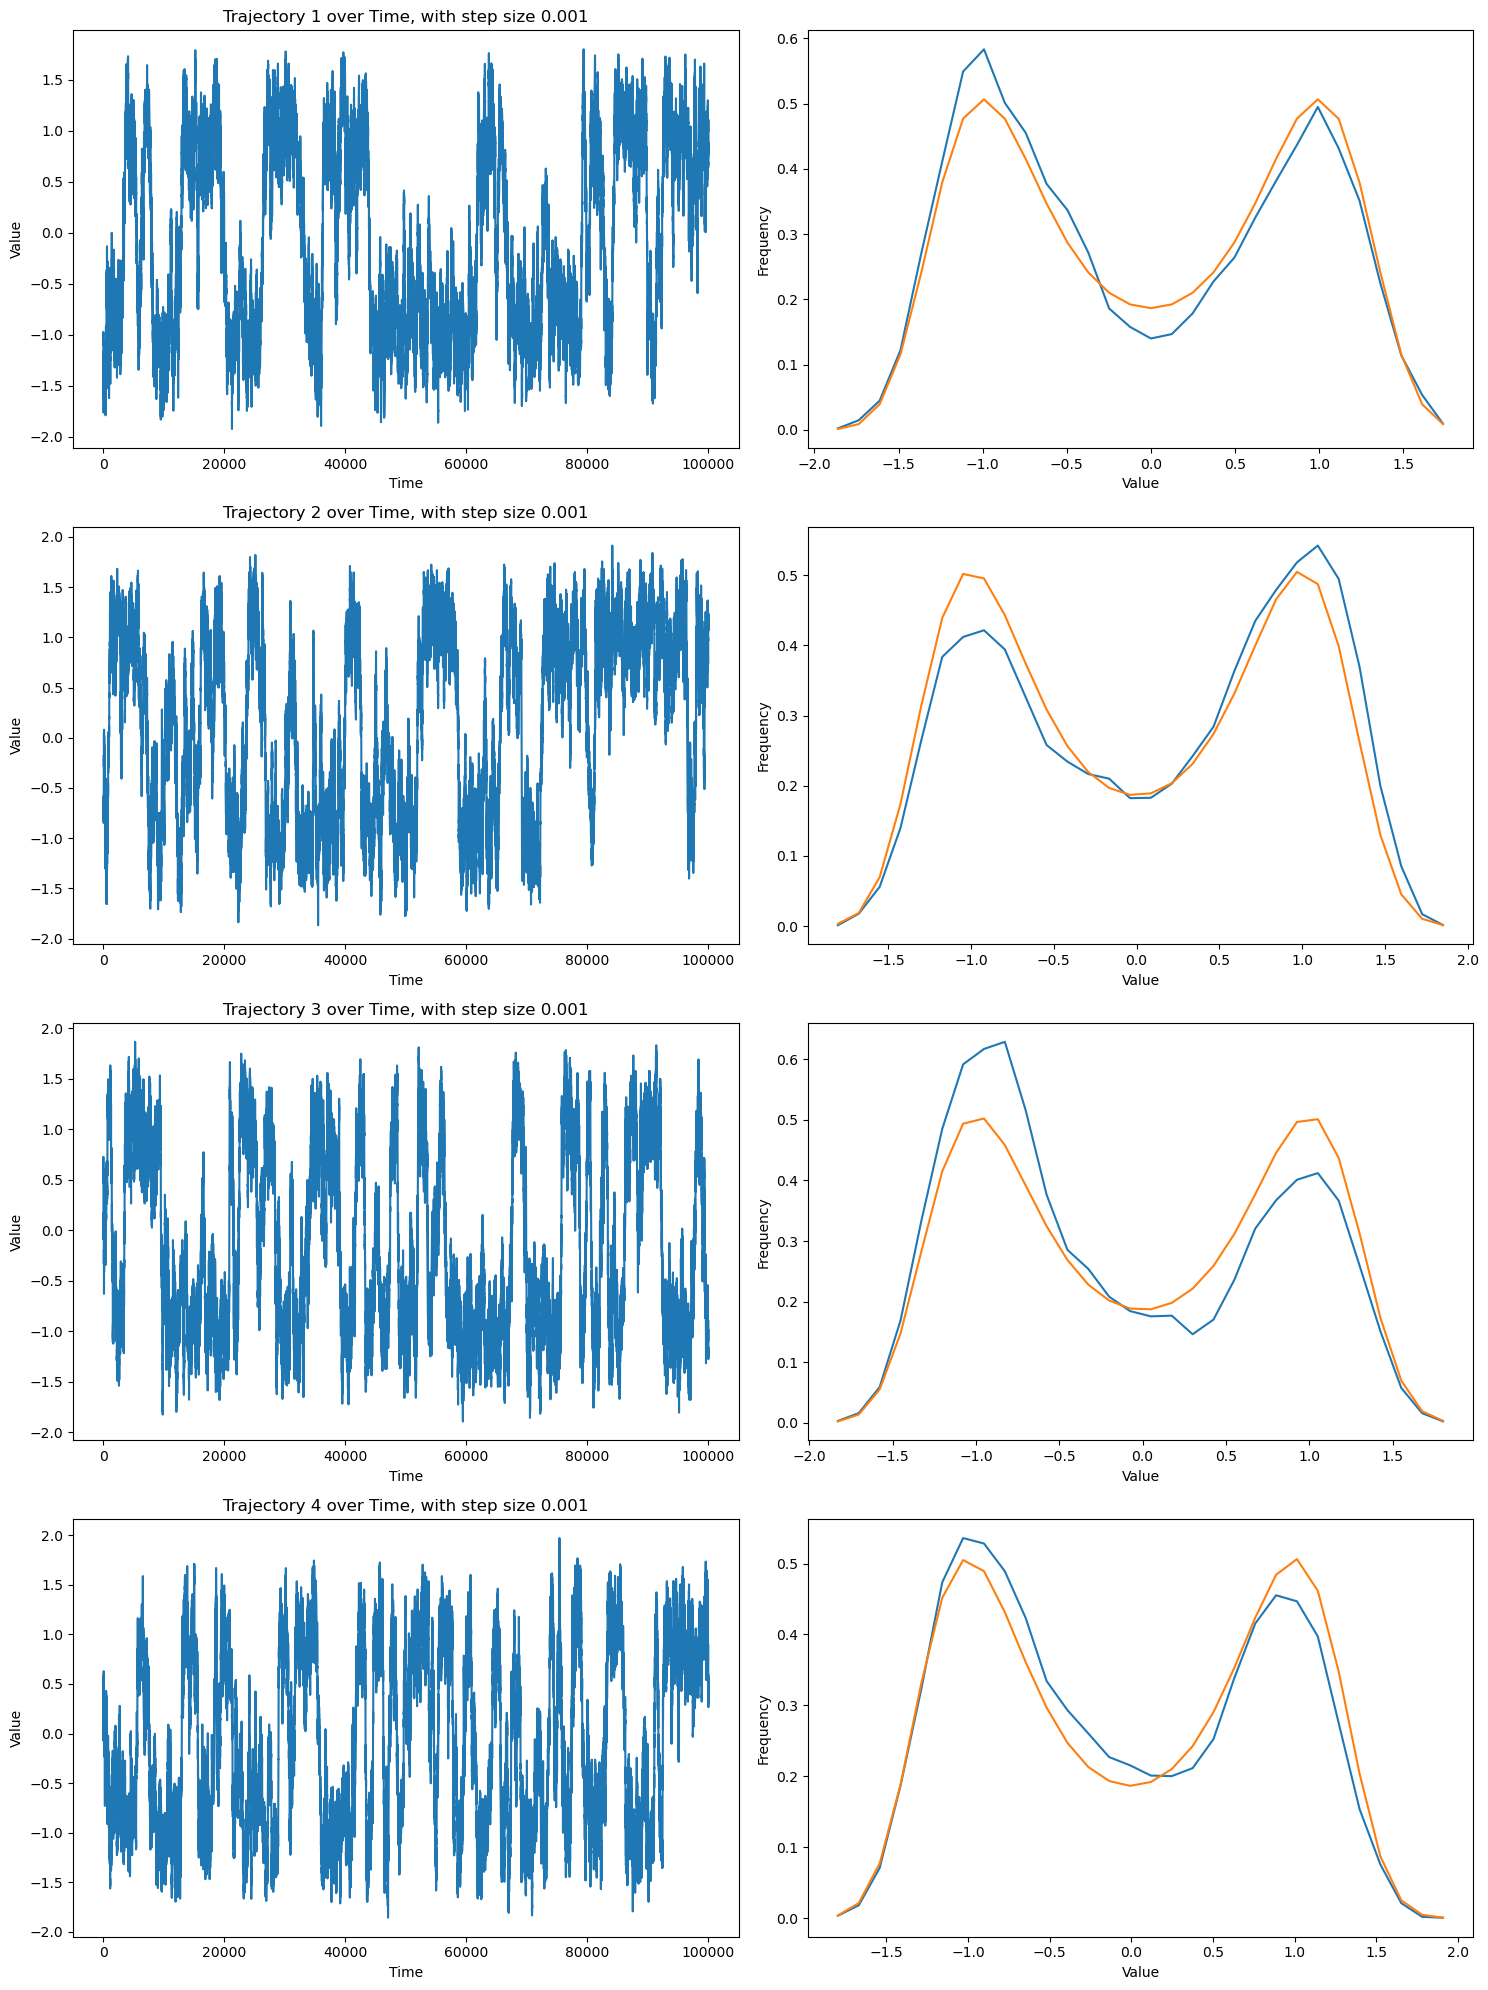

In [4]:
wasserstein_distances = []

# show trajectories with respect to time
fig, axs = plt.subplots(len(trajectories), 2, figsize=(15, 5 * len(trajectories)))

for i, (step_s, traj) in enumerate(zip(step_size_arr, trajectories)):
    # Plot trajectory
    axs[i, 0].plot(traj)
    axs[i, 0].set_title(f'Trajectory {i + 1} over Time, with step size {step_s}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Value')
    
    # Plot histogram
    try:
        hist, bins = np.histogram(traj, bins=30, density=True)
        midx = (bins[1:] + bins[:-1]) / 2
        rho = np.exp(-beta * pot(midx))
        rho = rho / (rho.sum() * (midx[1] - midx[0]))
        axs[i, 1].plot(midx, hist, label='Empirical')
        axs[i, 1].plot(midx, rho, label='Theoretical')
        # axs[i, 1].set_title(f'Histogram of Trajectory {i + 1}, with step size {step_s}')
        axs[i, 1].set_xlabel('Value')
        axs[i, 1].set_ylabel('Frequency')

        # Calculate Wasserstein distance
        wasserstein_distances.append(wasserstein_distance(hist, rho))
    except Exception as e:
        print(f"Error plotting histogram number {i}: {e}")    

plt.tight_layout()
plt.show()

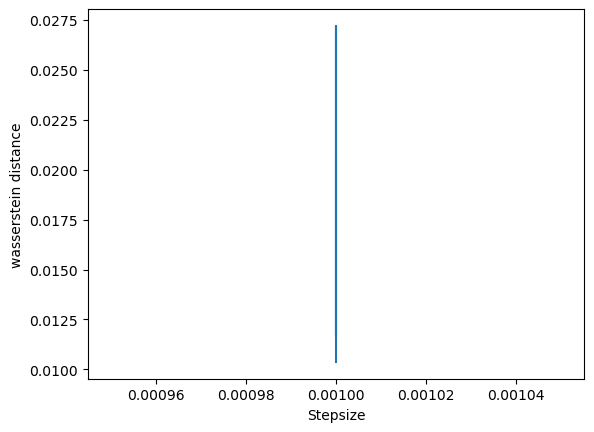

In [5]:
# show how the wasserstein distance changes with respect to the step size
# we slice step size array because some step sizes might have failed
plt.plot(step_size_arr[:len(wasserstein_distances)], wasserstein_distances)
plt.xlabel("Stepsize")
plt.ylabel("wasserstein distance")
plt.show()